# 04 Predict rating

In [1]:
import fasttext
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
model = fasttext.load_model('./data/fasttext_trained_model.bin')

In [3]:
df = pd.read_csv('./data/' + 'sklearn' + '.csv')

labelToTest = np.sort(model.labels)

totalactual = []

for i in labelToTest:
    totalactual.append(df[df['rating'].isin([i+" "])]) 
    
    
predictedList = []
for review in range(len(df)):
    predictedReview = model.predict(df['review'][review])
    predictedList.append(str(predictedReview[0]).split("'")[1])


amountPredicted = []
for label in labelToTest:
        label = label.replace(" ","")
        amountPredicted.append(list(filter(lambda k: label in k, predictedList)))
        
        
actualList= []     
fasttextList = []
for i in range(len(labelToTest)):
    actualList.append(len(totalactual[i]))
    fasttextList.append(len(amountPredicted[i]))

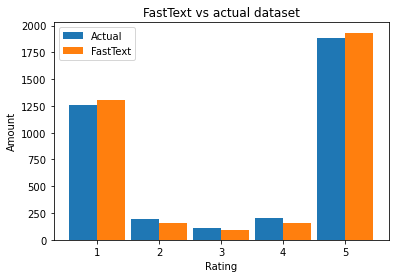

Actual ratings: [1258, 197, 106, 199, 1879]
FastText ratings: [1302, 161, 88, 155, 1933]


In [4]:
labels = []
for i in np.sort(labelToTest):
    labels.append(i.replace('__label__',''))
    
fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.45
actual = ax.bar(index, actualList, bar_width,
                label="Actual")

fasttext = ax.bar(index+bar_width, fasttextList,
                   bar_width, label="FastText")

ax.set_xlabel('Rating')
ax.set_ylabel('Amount')
ax.set_title('FastText vs actual dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

print('Actual ratings:', actualList)
print('FastText ratings:', fasttextList)

In [6]:
randomNumber = random.randint(0,len(df))
actualReview = df['review'][randomNumber]
actualRating = df['rating'][randomNumber]
predictedReview = model.predict(actualReview,k=-1)
print('Review nr:',randomNumber+2)
#print('Det faktiske review, som det står på trustpilot: '+'\n'+actualReview)
zip_iterator = zip(predictedReview[0], predictedReview[1])
mod_dict = dict(zip_iterator)

print('Reviewet har den faktiske rating: '+actualRating)
print('Fasttext har estimeret følgende ratings, sorteret efter den rating, som fasttext mener er mest sandsynlig')
for k, v in mod_dict.items():
    print(str(k)+' ' + str(v*10))


Review nr: 3522
Reviewet har den faktiske rating: __label__5 
Fasttext har estimeret følgende ratings, sorteret efter den rating, som fasttext mener er mest sandsynlig
__label__5 9.820237755775452
__label__1 0.14513582922518253
__label__2 0.061075626872479916
__label__3 0.00010000003385357559
__label__4 0.00010000003385357559
